# 从tushare抓取数据

# 分别获取前复权和后复权数据


In [20]:
import tushare as ts
# ts.get_h_data('000001') #前复权
# #ts.get_h_data('002337', start='2015-01-04', end='2015-01-05') 
# ts.get_h_data('000001', autype='hfq') #后复权
a = ts.get_h_data('000001', start='2017-01-01', end='2017-12-31') 
qfq=a['close'].sort_index()
a = ts.get_h_data('000001', start='2017-01-01', end='2017-12-31',autype='hfq') 
hfq=a['close'].sort_index()

[Getting data:]###[Getting data:]###

# 前复权实现：

In [38]:
#coding:utf-8
import pandas as pd
import numpy as np
import requests as re
import pandas as pd
def qianfuquan(year,code,period):    #计算前复权的方法
    jidu='4'
    year=str(year)
    code=str(code)
    period=int(period)
    data=pd.read_html('http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_FuQuanMarketHistory/stockid/'
                      +code+'.phtml?year='+year+'&jidu='+jidu)       #获取股票信息的url，其中股票代码，年份，季度可以设置为变量，方便查看不同股票，不同时间情况
    data=data[14].iloc[2:,[0,7]].iloc[:,1]
    pingan=pd.read_csv('D:\\no\SZ#'+code+'.txt')
    datano=pingan.iloc[:,0]            #广发不复权数据，用于计算预测的前复权
    pingan=pd.read_csv('D:\\before\SZ#'+code+'.txt')
    databefore=pingan.iloc[:,0]          #广发前复权数据
    num=8.87/float(data[60])
    print (type(num))
    predict=[]
    day=[]
    tushare=[]
    guangfa=[]
    j=3
    for jidu in ['1','2','3','4']:
        j=3
        data=pd.read_html('http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_FuQuanMarketHistory/stockid/'
                          +code+'.phtml?year='+year+'&jidu='+jidu)
        for i in datano[1:]:
            if j<61:             # 每个季度只有60个数据
                predict.append(str(num*float(data[14].iloc[2:,[0,7]].iloc[:,1][j])))
                day.append(data[14].iloc[2:,0][j-1])
                tushare.append(qfq[j-2])
                guangfa.append(databefore[j-1].split()[4])
                j=j+period
    day.sort()       #一开始时间是倒序，现在将时间变为顺序
    total={'day':day,'tushare':tushare,'predict':predict,'guangfa':guangfa}
    total=pd.DataFrame(total)
    
    return total,day

In [39]:
a=input('请输入年份，回溯周期以及股票代码(用空格隔开)：')
year,code, period=a.split(' ')
pinganqian,day=qianfuquan(year,code,period)
pinganqian

请输入年份，回溯周期以及股票代码(用空格隔开)：2017 000001 3
<class 'float'>


,day,tushare,predict,guangfa
0,2017-01-04,7.01,8.743138978187979,9.13
1,2017-01-09,7.00,8.743138978187979,9.11
2,2017-01-12,7.00,8.743138978187979,8.90
3,2017-01-17,7.00,8.743138978187979,8.79
4,2017-01-20,7.05,8.743138978187979,8.86
5,2017-01-25,7.08,8.743138978187979,8.76
6,2017-02-06,7.12,8.743138978187979,8.83
7,2017-02-09,7.12,8.743138978187979,8.78
8,2017-02-14,7.19,8.743138978187979,8.80
9,2017-02-17,7.18,8.743138978187979,8.84


# 后复权实现：

In [41]:
#coding:utf-8
import pandas as pd
import numpy as np
import requests as re
import pandas as pd

def houfuquan(year,code,period):       #计算后复权的方法，跟前复权类似
    year=str(year)
    code=str(code)
    period=int(period)
    data=pd.read_html('http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_FuQuanMarketHistory/stockid/'
                      +code+'.phtml?year='+year+'&jidu=1')
    data=data[14].iloc[2:,[0,7]].iloc[:,1]
    num=8.87*float(data[2])
    pingan=pd.read_csv('D:\\no\SZ#'+code+'.txt')
    datano=pingan.iloc[:,0]
    pingan=pd.read_csv('D:\\after\SZ#'+code+'.txt')
    dataafter=pingan.iloc[:,0]       #广发后复权数据
    predict=[]
    day=[]
    tushare=[]
    guangfa=[]
    for jidu in ['1','2','3','4']:
        j=3
        data=pd.read_html('http://vip.stock.finance.sina.com.cn/corp/go.php/vMS_FuQuanMarketHistory/stockid/'
                          +code+'.phtml?year='+year+'&jidu='+jidu)
        for i in datano[1:]:
            if j<61:
                predict.append(str(num/float(data[14].iloc[2:,[0,7]].iloc[:,1][63-j])))
                day.append(data[14].iloc[2:,0][j-1])
                tushare.append(hfq[j-2])
                guangfa.append(dataafter[j-1].split()[4])
                j=j+period            #period为间隔时间，为了缩短运行时间，可以间隔几天取一次数据

    day.sort()
    total={'day':day,'tushare':tushare,'predict':predict,'guangfa':guangfa}
    total=pd.DataFrame(total)

    return total,day

In [43]:
a=input('请输入年份，回溯周期以及股票代码(用空格隔开)：')
year,code, period=a.split(' ')
pinganhou,day=houfuquan(year,code,period)
pinganhou

请输入年份，回溯周期以及股票代码(用空格隔开)：2017 000001 3


,day,tushare,predict,guangfa
0,2017-01-04,1044.80,8.87,9.42
1,2017-01-09,1043.66,8.87,9.40
2,2017-01-12,1043.66,8.87,9.19
3,2017-01-17,1043.66,8.869922235275551,9.08
4,2017-01-20,1051.65,8.869922235275551,9.15
5,2017-01-25,1056.21,8.869922235275551,9.05
6,2017-02-06,1061.91,8.87,9.12
7,2017-02-09,1061.91,8.869922235275551,9.07
8,2017-02-14,1072.18,8.87,9.09
9,2017-02-17,1071.04,8.87,9.13


# 第二题

# 计算kdj

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('D:\price.csv')
# converting from UNIX timestamp to normal
df['date'] = pd.to_datetime(df['date']).dt.date
array_date = np.array(df['date'])
array_close = np.array(df['close'])
array_open = np.array(df['open'])
array_high = np.array(df['high'])
array_low = np.array(df['low'])
array_volume = np.array(df['volume'])
print("High Array size",array_high.size)
print("Low Array size",array_low.size)
print("Open Array size",array_open.size)
print("Close Array size",array_close.size)
y=0
z=0
#kperiods are 14 array start from 0 index
kperiods=13
array_highest=[]
for x in range(0,array_high.size-kperiods):
	z=array_high[y]
	for j in range(0,kperiods):
		if(z<array_high[y+1]):
			z=array_high[y+1]
		y=y+1
	# creating list highest of k periods
	array_highest.append(z)
	y=y-(kperiods-1)
print("Highest array size",len(array_highest))
# print(array_highest)
y=0
z=0
array_lowest=[]
for x in range(0,array_low.size-kperiods):
	z=array_low[y]
	for j in range(0,kperiods):
		if(z>array_low[y+1]):
			z=array_low[y+1]
		y=y+1
	# creating list lowest of k periods
	array_lowest.append(z)
	y=y-(kperiods-1)
print(len(array_lowest))
# print(array_lowest)

#KDJ (K line, D line, J line)
Kvalue=[]
for x in range(kperiods,array_close.size):
   k = ((array_close[x]-array_lowest[x-kperiods])*100/(array_highest[x-kperiods]-array_lowest[x-kperiods]))
   Kvalue.append(k)
print(len(Kvalue))
print('K值：',Kvalue)
y=0
# dperiods for calculate d values
dperiods=3
Dvalue=[None,None]
mean=0
for x in range(0,len(Kvalue)-dperiods+1):
	sum=0
	for j in range(0,dperiods):
		sum=Kvalue[y]+sum
		y=y+1
	mean=sum/dperiods
	# d values for %d line
	Dvalue.append(mean)
	y=y-(dperiods-1)
print(len(Dvalue))
print('D值：',Dvalue)
Jvalue=[]
for x in range(0,len(Dvalue)-dperiods+1):
	j=(Dvalue[x+2]*3)-(Kvalue[x+2]*2)
	# j values for %j line
	Jvalue.append(j)
print(len(Jvalue))
print('J值：',Jvalue)

High Array size 244
Low Array size 244
Open Array size 244
Close Array size 244
Highest array size 231
231
231
K值： [31.14684423036045, 70.4894807678686, 36.88460721116384, 15.569880286179814, 36.06290288304874, 63.46185806880501, 63.46185806880501, 38.7045813586097, 67.89027194164748, 91.47182957057679, 81.74897119341557, 76.13047114580431, 98.37020337231692, 64.25571790511225, 94.37753791691249, 68.2712664422309, 60.240169367993616, 15.918309759796871, 16.732237129695083, 8.947846262483647, 10.894784626248388, 19.029962322827608, 4.852332475668395, 5.825595704217455, 6.041459975980393, 16.79192566762686, 4.5770688434467575, 7.227937195452092, 12.161625598505179, 9.809659246294402, 18.987018669778273, 21.656710473914806, 21.656710473914806, 4.145758661887725, 8.955673072788992, 19.9976954542836, 6.665898484761157, 26.001037045572463, 54.0057039149598, 93.74831217931423, 63.932568352458084, 77.05057373565684, 39.33984983708743, 70.4915710440573, 67.20498654200327, 58.33213308368135, 30.

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]


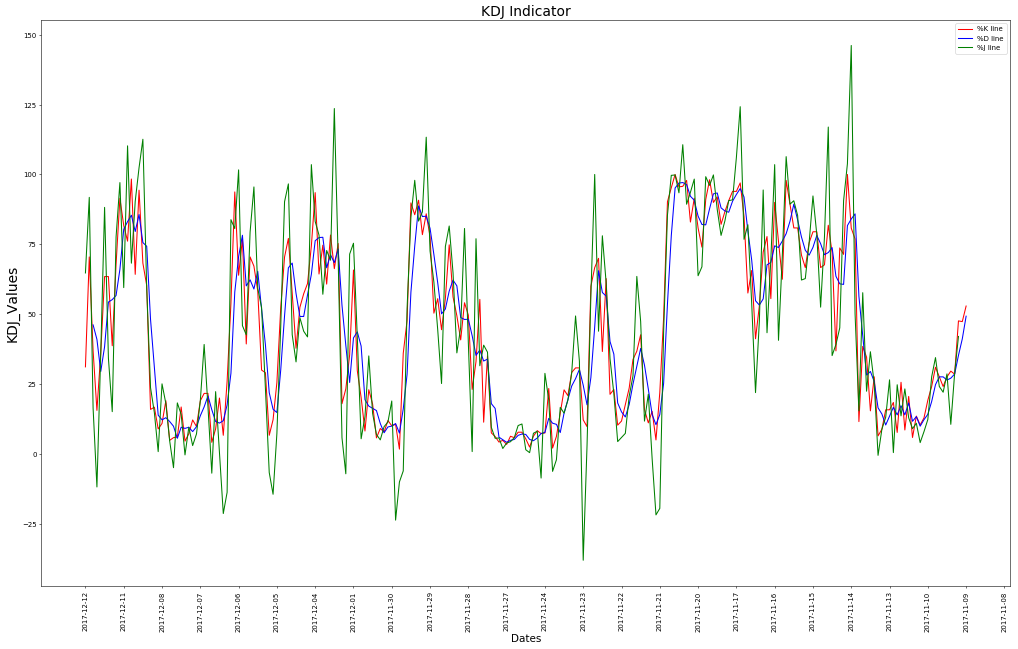

In [6]:
plt.figure(figsize=(25,15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca() 
plt.plot(Kvalue,color='red',label = '%K line')
plt.plot(Dvalue,color='blue',label = '%D line')
plt.plot(Jvalue,color='green',label = '%J line')
plt.title('KDJ Indicator', fontsize=20)
df['date'] = df['date'].reset_index()
x=list(df['date'].index)
for i in range(len(x)):
    if (i%10)==0:
        continue
    else:
        x.remove(i)
print (x)
labels = array_date[13:]
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.ylabel('KDJ_Values', fontsize=20)
plt.xlabel('Dates', fontsize=15)
plt.legend()
plt.show()

# 计算macd

In [1]:
import pandas as pd
import tushare as ts

#定义一个函数get_a_share

def get_a_share(code):

#使用tushare的get_k_data调用A股股票数据

    data = ts.get_k_data(code,start='2017-01-01', end='2017-12-31')

    #删除列code

    data = data.drop('code',axis = 1)

    #返回修改后的股票数据

    return data

    #定义函数，获取macd,导入数据，初始化三个参数

def get_macd_data(data,short=0,long=0,mid=0):

    if short==0:

        short=12

    if long==0:

        long=26

    if mid==0:

        mid=9

    #计算短期的ema，使用pandas的ewm得到指数加权的方法，mean方法指定数据用于平均

    data['sema']=pd.Series(data['close']).ewm(span=short).mean()

    #计算长期的ema，方式同上

    data['lema']=pd.Series(data['close']).ewm(span=long).mean()

    #填充为na的数据

    data.fillna(0,inplace=True)

    #计算dif，加入新列data_dif

    data['data_dif']=data['sema']-data['lema']

    #计算dea

    data['data_dea']=pd.Series(data['data_dif']).ewm(span=mid).mean()

    #计算macd

    data['data_macd']=2*(data['data_dif']-data['data_dea'])

    #填充为na的数据

    data.fillna(0,inplace=True)

    #返回data的三个新列

    return data[['date','data_dif','data_dea','data_macd']]

    #请输入A股股票代码

code = str(input('输入A股股票代码:'))

data = get_a_share(code)

macd = get_macd_data(data)

macd

macd['data_macd'][2]

输入A股股票代码:000001


0.00032941706927624265

# 写入mysql数据库

In [ ]:
import pymysql
# 打开数据库连接
db = pymysql.connect("localhost","root","root","stockprice" )
# 使用 cursor() 方法创建一个游标对象 cursor
cursor = db.cursor()
# 使用 execute() 方法执行 SQL，如果表存在则删除
cursor.execute("DROP TABLE IF EXISTS price")
# 使用预处理语句创建表
sql = """CREATE TABLE price (
         day  CHAR(30)  primary key,
         predict  CHAR(30) ,
         tushare CHAR(30),
         guangfa CHAR(30),
         j_value CHAR(30),
         d_value CHAR(30),
         k_value CHAR(30),
         macd CHAR(30))"""
cursor.execute(sql)
# 关闭数据库连接
db.close()

# 写入数据：

In [ ]:
db = pymysql.connect("localhost","root","root","stockprice")
 
# 使用cursor()方法获取操作游标 
cursor = db.cursor()
Jvalue.append(0)
Jvalue.append(0)
for i in range (231):
    if Jvalue[i]==None:
        Jvalue[i]=0
    if Dvalue[i]==None:
        Dvalue[i]=0
    if Kvalue[i]==None:
        Kvalue[i]=0
    sql = "INSERT INTO price(day ,predict,tushare,guangfa,j_value,d_value,k_value,macd) VALUES ("+str(pinganhou['day'][i])+','+str(pinganhou['predict'][i])+','+str(pinganhou['tushare'][i])+','+str(pinganhou['guangfa'][i])+','+str(Jvalue[i])+','+str(Jvalue[i])+','+str(Kvalue[i])+','+str(macd['data_macd'][i])+")"
    print (sql)
    try:
        cursor.execute(sql)
        db.commit()
        print ('成功')
    except:
        db.rollback()
# 关闭数据库连接
db.close()